In [2]:
# printing first few datas in the dataset
import pandas as pd 

data = pd.read_csv('raw_analyst_ratings.csv')

print(data.head())

   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-26 04:30:07-04:00 

In [3]:
# obtaining headline length
stats = data['headline'].apply(len)
print(stats)

0          39
1          42
2          29
3          44
4          87
           ..
1407323    38
1407324    52
1407325    56
1407326    54
1407327    81
Name: headline, Length: 1407328, dtype: int64


In [4]:
# count number of articles per publisher
articles_per_publisher = data['publisher'].value_counts()
articles_summary = articles_per_publisher.reset_index()
articles_summary.columns = ['publisher', 'article_count']
print(articles_summary)

              publisher  article_count
0         Paul Quintaro         228373
1            Lisa Levin         186979
2     Benzinga Newsdesk         150484
3         Charles Gross          96732
4         Monica Gerson          82380
...                 ...            ...
1029          MoneyGeek              1
1030             muathe              1
1031      Robert Morris              1
1032    LeftCoastHedgie              1
1033     Jeremie Capron              1

[1034 rows x 2 columns]


In [5]:
# group by publication date and count articles
daily_trends = data.groupby('date').size()
print(daily_trends)

date
2009-02-14 00:00:00          1
2009-04-27 00:00:00          2
2009-04-29 00:00:00          1
2009-05-22 00:00:00          1
2009-05-27 00:00:00          6
                            ..
2020-06-11 16:49:41-04:00    1
2020-06-11 16:51:33-04:00    1
2020-06-11 17:01:39-04:00    1
2020-06-11 17:11:20-04:00    1
2020-06-11 17:12:35-04:00    1
Length: 39957, dtype: int64


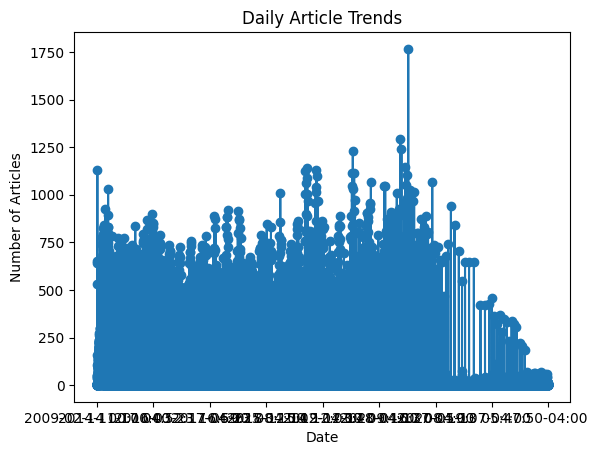

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('raw_analyst_ratings.csv')

# plot daily trends
daily_trends = data.groupby('date').size()
daily_trends.plot(kind='line', marker='o', title='Daily Article Trends')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()

In [10]:
# performing sentiment analysis using VADER
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to analyze sentiment using VADER
def get_vader_sentiment(text):
    scores = sia.polarity_scores(text)
    if scores['compound'] > 0.05:
        return "Positive"
    elif scores['compound'] < -0.05:
        return "Negative"
    else:
        return "Neutral"

# Apply the function to the headline column
data['sentiment'] = data['headline'].apply(get_vader_sentiment)

# Save the results to a new CSV
data.to_csv('news_with_sentiment.csv', index=False)

print(data[['headline', 'sentiment']].head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\herme\AppData\Roaming\nltk_data...


                                            headline sentiment
0            Stocks That Hit 52-Week Highs On Friday   Neutral
1         Stocks That Hit 52-Week Highs On Wednesday   Neutral
2                      71 Biggest Movers From Friday   Neutral
3       46 Stocks Moving In Friday's Mid-Day Session   Neutral
4  B of A Securities Maintains Neutral on Agilent...  Positive


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Sample dataset
data = pd.read_csv('raw_analyst_ratings.csv')

# Define stopwords and preprocessing function
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Tokenize and convert to lowercase
    tokens = [word for word in tokens if word.isalnum() and word not in stop_words]  # Remove punctuation and stopwords
    return ' '.join(tokens)

# Apply preprocessing
data['processed_headline'] = data['headline'].apply(preprocess_text)

# Check results
print(data[['headline', 'processed_headline']])




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\herme\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\herme\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - 'C:\\Users\\herme/nltk_data'
    - 'c:\\Users\\herme\\stock\\venv\\nltk_data'
    - 'c:\\Users\\herme\\stock\\venv\\share\\nltk_data'
    - 'c:\\Users\\herme\\stock\\venv\\lib\\nltk_data'
    - 'C:\\Users\\herme\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************
